<a href="https://colab.research.google.com/github/LuisDLCP/MineriaDatos-PC2/blob/main/Signal_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
root_path="./drive/MyDrive/Master_Program_CC/AprendizajeAutomatico/PC2/Dataset/"
!ls {root_path}

dataset.json  RawData1.xlsx  RawData2.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq
from scipy.signal import argrelextrema
import numpy as np

**1) READING THE DATA SET** 

In [ ]:
df = pd.read_excel(input_path+"RawData2.xlsx")
df.head()

,id,num,actividad,genero,edad,ejex,ejey,ejez,usuario,fecha
0,1,1,parado,hombre,joven,-1.61,3.35,9.51,Luis,2022-01-06 00:13:40
1,2,2,parado,hombre,joven,-1.61,3.35,9.51,Luis,2022-01-06 00:13:40
2,3,3,parado,hombre,joven,-1.61,3.35,9.51,Luis,2022-01-06 00:13:40
3,4,4,parado,hombre,joven,-1.61,3.35,9.51,Luis,2022-01-06 00:13:40
4,5,5,parado,hombre,joven,-1.61,3.35,9.51,Luis,2022-01-06 00:13:40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57375 entries, 0 to 57374
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         57375 non-null  int64  
 1   num        57375 non-null  int64  
 2   actividad  57375 non-null  object 
 3   genero     57375 non-null  object 
 4   edad       57375 non-null  object 
 5   ejex       57375 non-null  float64
 6   ejey       57375 non-null  float64
 7   ejez       57375 non-null  float64
 8   usuario    57375 non-null  object 
 9   fecha      57375 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 4.4+ MB


In [ ]:
# Make the following changes
#  1) echado & seleccione & sentado = parado
df["actividad"].replace(["echado","sentado","seleccione"],"parado", inplace=True)

**2) READ & PLOT THE SIGNALS**

In [ ]:
gb1 = df.groupby(["genero","edad","actividad"])
gb1.first()

id  num  ejex  ...   ejez  usuario                fecha
genero edad  actividad                    ...                                     
hombre joven caminando   8476    1 -1.30  ...   1.09     Luis  2022-01-06 00:44:04
             otros        751    1 -0.35  ...   7.38     Luis  2022-01-06 00:22:00
             parado         1    1 -1.61  ...   9.51     Luis  2022-01-06 00:13:40
             saltando   26851    1  0.52  ...  10.01     Luis  2022-01-06 02:22:49
mujer  joven caminando  20776    1 -0.55  ...   9.16  Guiomar  2022-01-06 01:21:43
             parado     16951    1 -0.04  ...   9.13  Guiomar  2022-01-06 01:15:27
             saltando   28501    1 -1.37  ...  13.50  Guiomar  2022-01-06 02:33:20

[7 rows x 7 columns]

In [ ]:
# Get the number of available signals 
gb_aux1 = df.groupby(["genero","edad","actividad","num"])
df_aux1 = gb_aux1.count().query('num==1')
df_aux1

id  ejex  ejey  ejez  usuario  fecha
genero edad  actividad num                                       
hombre joven caminando 1    109   109   109   109      109    109
             otros     1    157   157   157   157      157    157
             parado    1    252   252   252   252      252    252
             saltando  1    104   104   104   104      104    104
mujer  joven caminando 1     41    41    41    41       41     41
             parado    1     51    51    51    51       51     51
             saltando  1     51    51    51    51       51     51

In [ ]:
cant = df_aux1["id"].sum()
print(f"Cantidad de señales en total: {cant}")

Cantidad de señales en total: 765


In [ ]:
# Select a group
gender = "hombre"
age = "joven"
action = "caminando"
gb2 = gb1.get_group((gender,age,action))
gb2.head()

,id,num,ejex,ejey,ejez,usuario,fecha
8475,8476,1,-1.30,8.63,1.09,Luis,2022-01-06 00:44:04
8476,8477,2,-0.58,9.19,-0.15,Luis,2022-01-06 00:44:04
8477,8478,3,-0.58,9.19,-0.15,Luis,2022-01-06 00:44:04
8478,8479,4,-0.71,11.07,-1.19,Luis,2022-01-06 00:44:04
8479,8480,5,-0.71,11.07,-1.19,Luis,2022-01-06 00:44:04


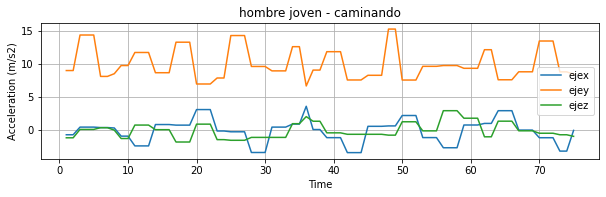

In [ ]:
# Plot a group 
gb2.groupby("num").nth(1)[["ejex","ejey","ejez"]].plot(legend=True, grid=True, xlabel="Time", ylabel="Acceleration (m/s2)",figsize=(10,2.5))
plt.title(f"{gender} {age} - {action}")
plt.savefig("fig.png")

**3) DIVIDIR LA SEÑAL EN 3 PARTES IGUALES**

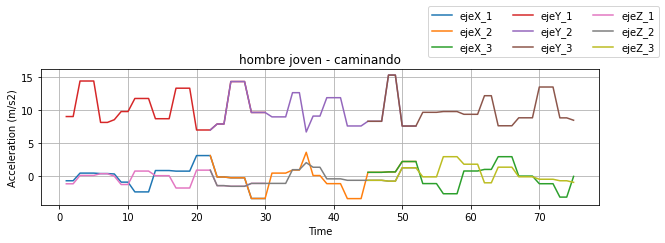

In [ ]:
# Divide it and then plot it 
plt.figure(figsize=(10,2.5))
gb2.groupby("num").nth(1).iloc[:30].loc[:,"ejex"].plot()
gb2.groupby("num").nth(1).iloc[21:52].loc[:,"ejex"].plot()
gb2.groupby("num").nth(1).iloc[44:].loc[:,"ejex"].plot()
gb2.groupby("num").nth(1).iloc[:30].loc[:,"ejey"].plot()
gb2.groupby("num").nth(1).iloc[21:52].loc[:,"ejey"].plot()
gb2.groupby("num").nth(1).iloc[44:].loc[:,"ejey"].plot()
gb2.groupby("num").nth(1).iloc[:30].loc[:,"ejez"].plot()
gb2.groupby("num").nth(1).iloc[21:52].loc[:,"ejez"].plot()
gb2.groupby("num").nth(1).iloc[44:].loc[:,"ejez"].plot()
plt.xlabel("Time")
plt.ylabel("Acceleration (m/s2)")
plt.grid()
plt.legend(("ejeX_1", "ejeX_2","ejeX_3", "ejeY_1", "ejeY_2", "ejeY_3","ejeZ_1", "ejeZ_2","ejeZ_3"),
           loc='lower center', ncol=3, bbox_to_anchor=(0.9, 1.05))
plt.title(f"{gender} {age} - {action}")
plt.savefig("fig_segmentation.png", bbox_inches='tight', fancybox=True, shadow=True)



In [ ]:
# Dividir en 30 puntos cada uno, con un solapamiento de 8 y 7 puntos
# Then it's saved in a list 
listaX = gb2.groupby("num").nth(1)["ejex"].values.tolist()
listaX_1 = listaX[:30]
listaX_2 = listaX[22:52]
listaX_3 = listaX[45:]
print(listaX_3)

[0.52, 0.52, 0.58, 0.58, 2.16, 2.16, 2.16, -1.19, -1.19, -1.19, -2.73, -2.73, -2.73, 0.72, 0.72, 0.72, 0.96, 0.96, 2.89, 2.89, 2.89, -0.05, -0.05, -0.05, -1.21, -1.21, -1.21, -3.24, -3.24, -0.1]


**4) Filtrado de la señal** 

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / (2*fs)
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:
fs=15 # Hz
cutoff=10 #Hz
order=2
y = butter_lowpass_filter(listaX, cutoff, fs, order)

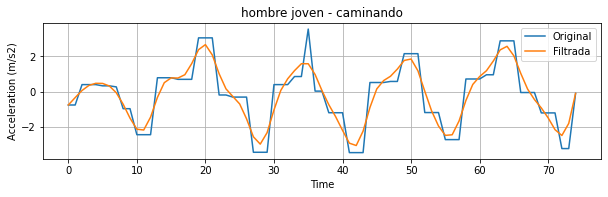

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(listaX, label='Original')
plt.plot(y, label='Filtrada')
plt.xlabel("Time")
plt.ylabel("Acceleration (m/s2)")
plt.title(f"{gender} {age} - {action}")
plt.legend()
plt.grid()
plt.savefig("fig_filtrada.png", bbox_inches='tight', fancybox=True, shadow=True)

**5) Calculando la FFT**

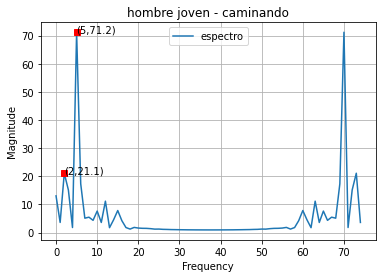

In [ ]:
yf = fft(y)
# Select all peaks 
m=argrelextrema(np.abs(yf),np.greater, mode='wrap')
yf_peaks = [np.abs(yf)[m] for i in m]
# Select the first 2 peaks 
var_aux1=list(yf_peaks[0])
indices_aux = sorted(var_aux1, reverse=True)[:4]
if len(set(indices_aux))>2:
  indices_aux = sorted(list(set(indices_aux)),reverse=True)[:-1]
else:
  indices_aux = sorted(list(set(indices_aux)),reverse=True)
indices = [var_aux1.index(value) for value in indices_aux]
x_peak=[list(m[0])[i] for i in indices]
y_peak=indices_aux

fig,ax=plt.subplots()
plt.plot(np.abs(yf),label='espectro')
plt.plot(x_peak,y_peak,'rs')
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title(f"{gender} {age} - {action}")
for i in range(len(x_peak)):
  ax.annotate(f"({round(x_peak[i],1)},{round(y_peak[i],1)})",xy=(x_peak[i],y_peak[i]),xycoords='data')
plt.legend()
plt.grid()
plt.savefig("fig_fft.png", bbox_inches='tight', fancybox=True, shadow=True)

In [ ]:
# Select the frequency 
if x_peak[y_peak.index(max(y_peak))]==0:
  if max(y_peak)/min(y_peak)>15:
    freq_max = x_peak[y_peak.index(max(y_peak))]
  else:
    freq_max = x_peak[y_peak.index(min(y_peak))]
else:
  freq_max = x_peak[y_peak.index(max(y_peak))]
print(f"La maxima frecuencia es: {freq_max}")

La maxima frecuencia es: 5


**6) Crear el dataset**

In [ ]:
# 1) rms, whithout DC
np.sqrt(np.mean((y-np.mean(y))**2))

1.5164182841190332

In [ ]:
# 2) spectral energy
yf_aux = np.abs(yf)
yf_aux = yf_aux/max(yf_aux) # Normalizando [0,1]
np.mean(yf_aux)

0.08167042720088638

In [ ]:
# 3) Maximum peak frequency 
freq_max

5

In [ ]:
# Create the dataset
rms_listX = []
rms_listY = []
rms_listZ = []
spc_listX = []
spc_listY = []
spc_listZ = []
freq_listX = []
freq_listY = []
freq_listZ = []
E1, E2, E3, E4, E5, E6 = [], [], [], [], [], []

for value in gb1.groups.keys(): # for every event 
  gender = value[0] #"hombre"
  age = value[1] #"joven"
  action = value[2] #"caminando"
  gb2 = gb1.get_group(value)
  # 
  ejes = ["ejex","ejey","ejez"]
  cant = df_aux1.loc[value,("id")].values[0]
  for j in range(cant): # for every signal
    for eje in ejes: # for every axis 
      lista = gb2.groupby("num").nth(j)[eje].values.tolist()
      # Divide in three segments
      lista_1 = lista[:30]
      lista_2 = lista[22:52]
      lista_3 = lista[45:]
      lista_dic = {0:lista_1,1:lista_2,2:lista_3}
      for lista_i in lista_dic.values():
        # Apply a Butterworth filter (LPF) 
        y_filtered = butter_lowpass_filter(lista_i, cutoff, fs, order)
        # Apply a FFT 
        y_fft = np.abs(fft(y_filtered)) # magnitude 
        # Get the DATASET attributes 
        #   1) rms, whithout DC
        rms_value = np.sqrt(np.mean((y_filtered-np.mean(y_filtered))**2))
        #   2) spectral energy
        y_fft_aux = y_fft/max(y_fft) # Normalize between [0,1]
        spc_value = np.mean(y_fft_aux)
        #   3) Maximum peak frequency
        #      Select all peaks 
        m=argrelextrema(y_fft,np.greater, mode='wrap')
        yf_peaks = [y_fft[m] for i in m]
        #      Select the first 2 peaks 
        var_aux1=list(yf_peaks[0])
        indices_aux = sorted(var_aux1, reverse=True)[:4]
        if len(set(indices_aux))>2:
          indices_aux = sorted(list(set(indices_aux)),reverse=True)[:-1]
        else:
          indices_aux = sorted(list(set(indices_aux)),reverse=True)
        indices = [var_aux1.index(value) for value in indices_aux]
        x_peak=[list(m[0])[i] for i in indices]
        y_peak=indices_aux
        #       Select the max freq peak 
        if x_peak[y_peak.index(max(y_peak))]==0:
          if max(y_peak)/min(y_peak)>15:
            freq_value = x_peak[y_peak.index(max(y_peak))]
          else:
            freq_value = x_peak[y_peak.index(min(y_peak))]
        else:
          freq_value = x_peak[y_peak.index(max(y_peak))]

        #   Next, adding to the respective list
        if eje=='ejex':
          rms_listX.append(rms_value)
          spc_listX.append(spc_value)
          freq_listX.append(freq_value)
        elif eje=='ejey':
          rms_listY.append(rms_value)
          spc_listY.append(spc_value)
          freq_listY.append(freq_value)
        elif eje=='ejez':
          rms_listZ.append(rms_value)
          spc_listZ.append(spc_value)
          freq_listZ.append(freq_value)
        else:
          print("Axis name not found!")
          break
        
        # Create the states  
        if eje=='ejex':
          if value==('hombre','joven','parado'):
            E1.append(1)
            E2.append(0)
            E3.append(0)
            E4.append(0)
            E5.append(0)
            E6.append(0)
          elif value==('hombre','joven','caminando'):
            E1.append(0)
            E2.append(1)
            E3.append(0)
            E4.append(0)
            E5.append(0)
            E6.append(0)
          elif value==('hombre','joven','saltando'):
            E1.append(0)
            E2.append(0)
            E3.append(1)
            E4.append(0)
            E5.append(0)
            E6.append(0)
          elif value==('hombre','joven','otros'):
            E1.append(0)
            E2.append(0)
            E3.append(0)
            E4.append(0)
            E5.append(0)
            E6.append(0)
          elif value==('mujer','joven','parado'):
            E1.append(0)
            E2.append(0)
            E3.append(0)
            E4.append(1)
            E5.append(0)
            E6.append(0)
          elif value==('mujer','joven','caminando'):
            E1.append(0)
            E2.append(0)
            E3.append(0)
            E4.append(0)
            E5.append(1)
            E6.append(0)
          elif value==('mujer','joven','saltando'):
            E1.append(0)
            E2.append(0)
            E3.append(0)
            E4.append(0)
            E5.append(0)
            E6.append(1)
          else:
            print('Error!')

print(E1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
df_final = pd.DataFrame(list(zip(rms_listX, rms_listY, rms_listZ,
                      spc_listX, spc_listY, spc_listZ,
                      freq_listX, freq_listY, freq_listZ, 
                      E1, E2, E3, E4, E5, E6)),
             columns=[
                      "rms_x", "rms_y", "rms_z",
                      "spc_x", "spc_y", "spc_z",
                      "frq_x", "frq_y", "frq_z",
                      "E1", "E2", "E3", "E4", "E5", "E6"
             ])
df_final.head()

,rms_x,rms_y,rms_z,spc_x,spc_y,spc_z,frq_x,frq_y,frq_z,E1,E2,E3,E4,E5,E6
0,1.123152,1.505962,0.611471,0.165145,0.050070,0.235599,2,4,4,0,1,0,0,0,0
1,1.487090,1.669933,0.622680,0.162416,0.061106,0.246576,2,0,4,0,1,0,0,0,0
2,1.317462,1.427856,0.663076,0.183840,0.047816,0.268246,2,4,2,0,1,0,0,0,0
3,1.498560,1.815675,0.724357,0.199099,0.051180,0.174332,2,4,4,0,1,0,0,0,0
4,1.573426,1.674134,0.963957,0.154565,0.049664,0.262076,2,4,2,0,1,0,0,0,0


In [ ]:
# Save as excel 
df_final.to_excel(root_path + 'Dataset_final.xlsx', index=False)
df_final.to_csv(root_path + 'Dataset_final.csv')